# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [39]:
data = pd.read_csv('Categorical.csv')
data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


Remove the duplicate index column from the dataset. 

In [40]:
data['continent'].unique()

array(['North America', 'Asia', 'Africa', 'Europe', 'South America',
       'Oceania', 'Antarctica', 'Seven seas (open ocean)'], dtype=object)

## Map the data

Use the <i>'continent'</i> category for this analysis.

In [58]:
data_mapped = data.copy()
data_mapped['continent']=data_mapped['continent'].map({'North America':0,'South America':1,'Europe':2,'Asia':3,'Africa':4,'Antarctica':5,'Oceania':6,'Seven seas (open ocean)':7})
data_mapped

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,3
2,Angola,17.537368,-12.293361,4
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,2
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,6
237,Yemen,47.586762,15.909280,3
238,South Africa,25.083901,-29.000341,4
239,Zambia,27.774759,-13.458242,4


## Select the features

In [59]:
x=data_mapped.iloc[:,3:4]
x


,continent
0,0
1,3
2,4
3,0
4,2
...,...
236,6
237,3
238,4
239,4


## Clustering

Use 4 clusters initially.

In [60]:
kmeans=KMeans(4)


## Clustering results

In [61]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [62]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 2, 1, 0, 2, 2, 2, 2, 0, 2, 3, 1, 3, 3, 0, 3, 2, 2, 1, 2, 1, 1,
       2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2, 1, 1,
       1, 1, 3, 0, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 2, 0, 1, 0, 1, 1,
       2, 2, 1, 2, 3, 0, 2, 2, 3, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 0, 0, 0,
       3, 0, 2, 3, 0, 2, 0, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 1, 2, 2, 3, 0, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2,
       2, 0, 1, 2, 2, 1, 3, 0, 3, 2, 1, 2, 2, 2, 2, 3, 1, 1, 0, 3, 1, 2,
       1, 3, 1, 3, 1, 0, 3, 2, 2, 2, 3, 3, 2, 2, 0, 3, 0, 2, 3, 3, 2, 0,
       2, 2, 0, 2, 3, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 3, 3, 3, 1, 0, 2, 1,
       1, 0, 2, 1, 0, 2, 2, 2, 1, 0, 3, 2, 0, 1, 1, 2, 2, 2, 2, 3, 0, 1,
       2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 3, 3, 3, 2, 1, 1, 1])

In [63]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,0,0
1,Afghanistan,66.004734,33.835231,3,2
2,Angola,17.537368,-12.293361,4,1
3,Anguilla,-63.064989,18.223959,0,0
4,Albania,20.049834,41.142450,2,2
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,6,3
237,Yemen,47.586762,15.909280,3,2
238,South Africa,25.083901,-29.000341,4,1
239,Zambia,27.774759,-13.458242,4,1


## Plot the data

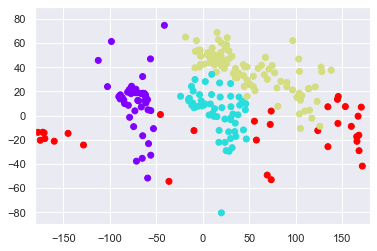

In [65]:
plt.scatter(data['Longitude'],data['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.